# MNIST 

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size 28x28 resolution images. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

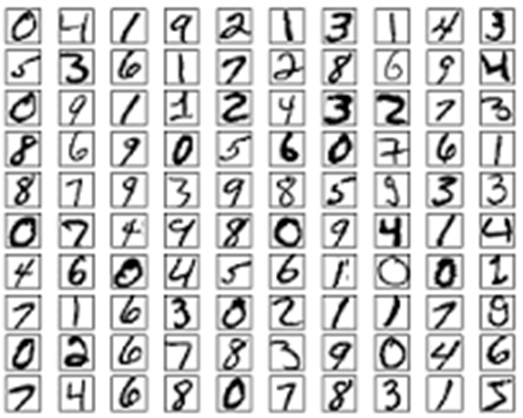

In [30]:
# importing required libraries and loading the MNIST dataset
import numpy as np  #Numpy library is used to work with array. Example: create or modify an array.
import os
os.chdir("C:\\Users\\MYPC\\Documents\\HSAI All Data, Classworks, Assignments\\PYTHON DATA\\20.05.2019")
# We read the data present in npz format. It's a dictionary which can hold multiple arrays.
train = np.load('mnist_train.npz')
x_train = train['data']
y_train = train['labels']

test = np.load('mnist_test.npz')
x_test = test['data']
y_test = test['labels']

In [19]:
y_train[7]

2.0

In [20]:
# Check the dimensions of the arrays
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape:  ',x_test.shape)
print('y_test shape:  ',y_test.shape)

x_train shape:  (60000, 784)
y_train shape:  (60000,)
x_test shape:   (10000, 784)
y_test shape:   (10000,)


In [21]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.
from keras.models import Sequential 
from keras.layers import Dense

In [23]:
# Building a 2 hidden layer MLP

model = Sequential() # This initializes a sequential model to which you we can keep adding layers.
model.add(Dense(200, kernel_initializer='uniform', input_dim = 784, activation='relu')) # Add a dense layer 
model.add(Dense(10, kernel_initializer='uniform', activation='softmax'))

In [24]:
# Setting learning and momentum
# Adam is the optimizer which is the state of the art Gradient Descent variation. 
from keras.optimizers import Adam
ada= Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer=ada,                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [25]:
nb_epochs = 5
# training the MLP model
history = model.fit(x_train, y_train, epochs=nb_epochs, batch_size=64, validation_split=0.1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 135us/step - loss: 1.4208 - acc: 0.8710 - val_loss: 0.2550 - val_acc: 0.9422
Epoch 2/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.2140 - acc: 0.9489 - val_loss: 0.2118 - val_acc: 0.9515
Epoch 3/5
54000/54000 [==============================] - 6s 118us/step - loss: 0.1694 - acc: 0.9578 - val_loss: 0.2102 - val_acc: 0.9557
Epoch 4/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.1712 - acc: 0.9589 - val_loss: 0.1956 - val_acc: 0.9532
Epoch 5/5
54000/54000 [==============================] - 7s 122us/step - loss: 0.1702 - acc: 0.9611 - val_loss: 0.2098 - val_acc: 0.9572


In [28]:
train_acc = history.history['acc']
train_loss = history.history['loss']
print(train_acc)
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

[0.871, 0.9488888889065495, 0.9578148148324754, 0.9588518518341912, 0.9610740740740741]


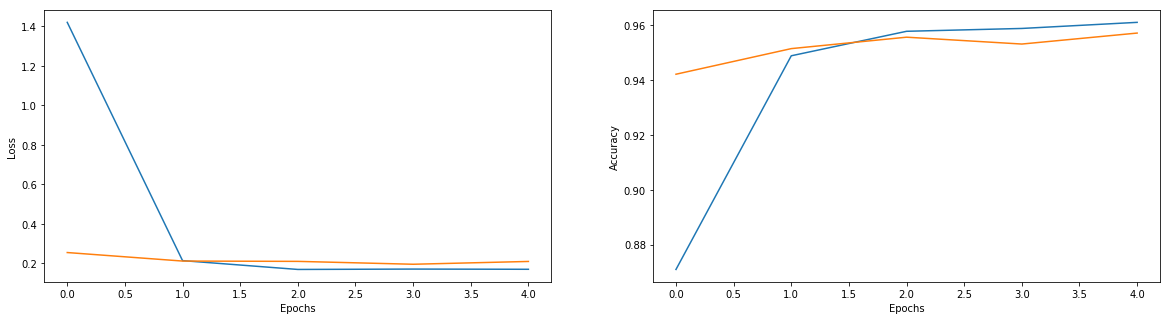

In [29]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

### Activity

1. Get the output of final layer on test data. What are it's dimensions? What do those values represent?

2. Get the class predictions for test data

3. Compute the Accuracy of the model on test data

HINT: Check model.predict, model.predict_classes, model.evaluate 

### Activity

1. Note down the accuracies for various number of nodes if the hidden layer and make a plot for the same

2. Note down the accuracies for various learning rate values make a plot for the same

HINT: Please check the plotting code above and explore matplotlib further if needed. Don't be afraid to explore on your own if needed and don't restrict yourself only to the material given in class. 

In [ ]:
# Psuedocode
# Learning Rate Vs. Accuracy
lr_list = []
acc_list = []
for l in lr_list:
    # Train the model for this learning rate
    # Evaluate the model on test data
    # Append the accuracy on test data to 'acc_list'

# Plot values in lr_list Vs. values in 'acc_list'
# Name the plot accordingly and label the axis properly

In [ ]:
# Psuedocode
# Hidden Nodes Vs. Accuracy
hidden_list = []
acc_list = []
for l in hidden_list:
    # Train the model for these hidden nodes
    # Evaluate the model on test data
    # Append the accuracy on test data to 'acc_list'

# Plot values in hidden_list Vs. values in 'acc_list'
# Name the plot accordingly and label the axis properly